# Dataset: California Housing Prices

### Get Data

In [1]:
import seaborn as sns

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-15 05:25:10--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8001::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1.36M  2.89MB/s    in 0.5s    

2023-09-15 05:25:11 (2.89 MB/s) - ‘housing.csv.1’ saved [1423529/1423529]



In [3]:
import pandas as pd

df = pd.read_csv('housing.csv')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
import seaborn as sns


<Axes: xlabel='median_house_value', ylabel='Count'>

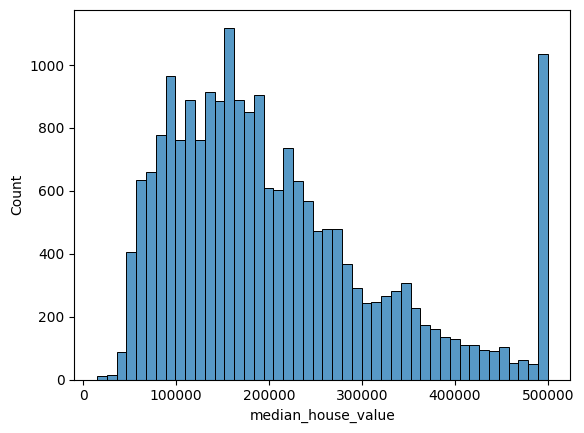

In [6]:
sns.histplot(df.median_house_value)

In [7]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [8]:
df = df[['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]

In [9]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


## Question 1
Find a feature with missing values. How many missing values does it have?

* [x] 207
* [ ] 307
* [ ] 408
* [ ] 508

In [10]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

## Question 2
What's the median (50% percentile) for variable 'population'?

* [ ] 1133
* [ ] 1122
* [x] 1166
* [ ] 1188

In [11]:
df.population.median()

1166.0

### Split the data

* Shuffle the initial dataset, use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('median_house_value') is not in your dataframe.
* Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [12]:
import numpy as np

In [14]:
np.random.seed(42)

n = len(df)

n_test = int(n * 0.2)
n_val = int(n * 0.2)
n_train = n - n_test - n_val

n_test, n_val, n_train

(4128, 4128, 12384)

In [16]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 20637, 20638, 20639])

In [17]:
np.random.shuffle(idx)
idx

array([20046,  3024, 15663, ...,  5390,   860, 15795])

In [18]:
# Shuffle the initial dataset

df_shuffled = df.iloc[idx]

In [19]:
df_shuffled

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0
...,...,...,...,...,...,...,...,...,...
11284,33.78,-117.96,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0
11964,34.02,-117.43,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0
5390,34.03,-118.38,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0


In [26]:
# Split your data in train/val/test sets, with 60%/20%/20% distribution
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train: n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val+n_test:].copy()

In [27]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [28]:
# Make sure that the target value ('median_house_value') is not in your dataframe.

y_train_orig = df_train.median_house_value
y_val_orig = df_val.median_house_value
y_test_orig = df_test.median_house_value

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [29]:
y_train_orig

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
           ...   
10292    461300.0
16722    205800.0
11730    146800.0
5993     151800.0
15993    420300.0
Name: median_house_value, Length: 12384, dtype: float64

In [30]:
# Apply the log transformation to the median_house_value variable using the np.log1p() function.

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

In [31]:
y_train

20046    10.772708
3024     10.732061
15663    13.122367
20484    12.295003
9814     12.535380
           ...    
10292    13.041806
16722    12.234665
11730    11.896833
5993     11.930326
15993    12.948726
Name: median_house_value, Length: 12384, dtype: float64

## Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

Options:

* [ ] With 0
* [ ] With mean
* [x] Both are equally good

In [32]:
df_train.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

### Option 1: Fill null value with 0

In [38]:
df_train_1 = df_train.copy()
df_val_1 = df_val.copy()
df_test_1 = df_test.copy()

df_train_2 = df_train.copy()
df_val_2 = df_val.copy()
df_test_2 = df_test.copy()

In [46]:
# Option 1: fill it with 0
df_train_1.fillna(value=0, inplace=True)
df_val_1.fillna(value=0, inplace=True)
df_test_1.fillna(value=0, inplace=True)

In [47]:
df_train_1.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [54]:
X_train_1 = df_train_1.values
X_val_1 = df_val_1.values
X_test_1 = df_test_1.values

In [53]:
X_train_1

array([[ 3.6060e+01, -1.1901e+02,  2.5000e+01, ...,  1.3920e+03,
         3.5900e+02,  1.6812e+00],
       [ 3.5140e+01, -1.1946e+02,  3.0000e+01, ...,  1.5650e+03,
         5.8400e+02,  2.5313e+00],
       [ 3.7800e+01, -1.2244e+02,  5.2000e+01, ...,  1.3100e+03,
         9.6300e+02,  3.4801e+00],
       ...,
       [ 3.8980e+01, -1.2091e+02,  1.3000e+01, ...,  3.2640e+03,
         1.1980e+03,  3.6530e+00],
       [ 3.4090e+01, -1.1772e+02,  3.6000e+01, ...,  7.8500e+02,
         2.9900e+02,  3.2566e+00],
       [ 3.7760e+01, -1.2247e+02,  3.4000e+01, ...,  1.1520e+03,
         4.4500e+02,  5.1893e+00]])

In [59]:
# Option 2: fill it with mean value
total_bedrooms_mean = df_train['total_bedrooms'].mean()
df_train_2.fillna(value=total_bedrooms_mean, inplace=True)
df_val_2.fillna(value=total_bedrooms_mean, inplace=True)
df_test_2.fillna(value=total_bedrooms_mean, inplace=True)

In [60]:
total_bedrooms_mean

533.4803317730147

In [61]:
X_train_2 = df_train_2.values
X_val_2 = df_val_2.values
X_test_2 = df_test_2.values

### Linear Regression

In [48]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [67]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [56]:
w1_0, w1 = train_linear_regression(X_train_1, y_train)

In [64]:
y_val_1_pred = w1_0 + X_val_1.dot(w1)

In [69]:
score1 = rmse(y_val, y_val_1_pred)

In [62]:
w2_0, w2 = train_linear_regression(X_train_2, y_train)

In [65]:
y_val_2_pred = w2_0 + X_val_2.dot(w2)

In [70]:
score2 = rmse(y_val, y_val_2_pred)

In [71]:
score1, score2

(0.32953303652279725, 0.3290193910380522)

In [72]:
round(score1, 2), round(score2, 2)

(0.33, 0.33)

# Regularization

## Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

* [ ] 0
* [x] 0.000001
* [ ] 0.001
* [ ] 0.0001

In [74]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [87]:
r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
score_reg = []
for reg in r:
    w0, w = train_linear_regression_reg(X_val_1, y_val, reg)
    y_val_pred = w0 + X_val_1.dot(w)
    score = rmse(y_val, y_val_pred)
    score = round(score, 2)
    reg_score = (reg, score)
    print(reg_score)
    
    score_reg.append(reg_score)



(0, 0.33)
(1e-06, 0.33)
(0.0001, 0.33)
(0.001, 0.33)
(0.01, 0.33)
(0.1, 0.33)
(1, 0.34)
(5, 0.34)
(10, 0.34)


Error should be minimum, here error = `33` and minimum `r` value is `0.000001`

## Question 5

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

Options:

* [ ] 0.16
* [ ] 0.00005
* [x] 0.005
* [ ] 0.15555

In [130]:
def split_data(df):
    # Split your data in train/val/test sets, with 60%/20%/20% distribution
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    print(n_train, n_val, n_test)
    
    df_train = df.iloc[:n_train].copy()
    df_val = df.iloc[n_train: n_train+n_val].copy()
    df_test = df.iloc[n_train+n_val+n_test:].copy()
    return df_train, df_val, df_test

In [162]:
def extract_features_labels(df):
    df = df.reset_index(drop=True)
    
    y_orig = df.median_house_value
    y = np.log1p(y_orig)
    del df['median_house_value']
    X = df.values
    return X, y 

In [166]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [181]:
def calculate_score(seed_value, df):
    n = len(df)
    idx = np.arange(n)
    np.random.seed(seed_value)
    np.random.shuffle(idx)
    
    # Data distribution: train/validation/test split with 60%/20%/20% distribution
    df_shuffled = df.iloc[idx]
    df_train, df_val, df_test = split_data(df_shuffled)
    # Fill missing value with 0     
    df_train.fillna(value=0, inplace=True)
    
    # Extract feature and label
    X_train, y_train = extract_features_labels(df_train)
    X_val, y_val = extract_features_labels(df_val)
    
    # Train Model
    w0, w = train_linear_regression(X_train, y_train)
    y_val_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_val_pred)
    return score

In [182]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# seed_values = [0]
scores = []
for seed in seed_values:
    score = calculate_score(seed, df)
    score = round(score, 2)
    scores.append(score)
    
print(scores)

12384 4128 4128
12384 4128 4128
12384 4128 4128
12384 4128 4128
12384 4128 4128
12384 4128 4128
12384 4128 4128
12384 4128 4128
12384 4128 4128
12384 4128 4128
[0.34, 0.34, 0.33, 0.34, 0.34, 0.34, 0.35, 0.34, 0.35, 0.34]


In [183]:
errors = np.array([0.0013229,  0.01223145, 0.18174351])
errors.mean()

0.06509928666666666

In [184]:
std_scores = np.std(scores)
std_scores = round(std_scores, 3)

In [185]:
std_scores

0.005

In [186]:
scores

[0.34, 0.34, 0.33, 0.34, 0.34, 0.34, 0.35, 0.34, 0.35, 0.34]

## Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

Options:

* [x] 0.35
* [ ] 0.135
* [ ] 0.450
* [ ] 0.245

In [187]:
n = len(df)

In [191]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
idx

array([20558, 11430,  2656, ...,  5014,  9979,   501])

In [210]:
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [211]:
df1 = df.copy()
df_train = df1[:n_train+n_val]
df_test = df1[n_train+n_val :]

In [212]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [213]:
df_train.fillna(value=0, inplace=True)
df_test.fillna(value=0, inplace=True)


In [214]:
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
16507,37.74,-121.11,11.0,3886.0,599.0,1605.0,529.0,4.4213,182700.0
16508,37.80,-121.10,35.0,1853.0,331.0,958.0,340.0,3.3578,149000.0
16509,37.76,-121.11,22.0,2606.0,411.0,1252.0,397.0,4.1833,192100.0
16510,37.73,-121.16,7.0,4956.0,941.0,3006.0,915.0,3.4426,139000.0


In [215]:
y_train_orig = df_train.median_house_value
y_train = np.log1p(y_train_orig)
del df_train['median_house_value']
X_train = df_train.values

In [216]:
y_test_orig = df_test.median_house_value
y_test = np.log1p(y_test_orig)
del df_test['median_house_value']
X_test = df_test.values

In [217]:
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

In [218]:
y_test_pred = w0 + X_test.dot(w)
y_test_pred

array([11.68075276, 11.78925644, 11.59631246, ..., 11.08705345,
       11.1464849 , 11.22936251])

In [221]:
score = rmse(y_test, y_test_pred)
score

0.3202775681838722

In [220]:
round(score, 2)

0.32